In [ ]:
Lab-3
Implement the following image enhancement techniques using Built-in and user
defined functions.
1. Apply Point operation or gray level transformation to detect the isolated
points in an image.
2. Reverse the order of pixels using image negative techniques for the Gray
scale, colour and binary image.
3. Implement Spatial domain technique to stretch the contrast of the image
to enhance visibility? How does it differ from histogram equalization?
4. Highlight the specific range of gray levels in an image by means of gray
level slicing.
5. Display the contribution made to the total image appearance of a finger
print image by means of bit plane slicing.
6. Perform Histogram equalization, Adaptive histogram equalization in
spatial domain to improve the contrast in the X-ray image justify How
does this technique enhance visibility?

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Isolated points can be detected using Laplacian or high-pass filtering.

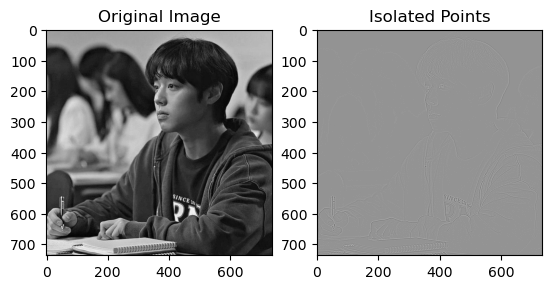

In [10]:
def detect_isolated_points(image_path):
    image = cv2.imread(image_path, 0)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(122), plt.imshow(laplacian, cmap='gray'), plt.title('Isolated Points')
    plt.show()

detect_isolated_points('image.jpg')


### Image Negative Transformation

For color images, apply the negative transformation to each channel (R, G, B) separately. For binary images, invert the pixels (0→1, 1→0).

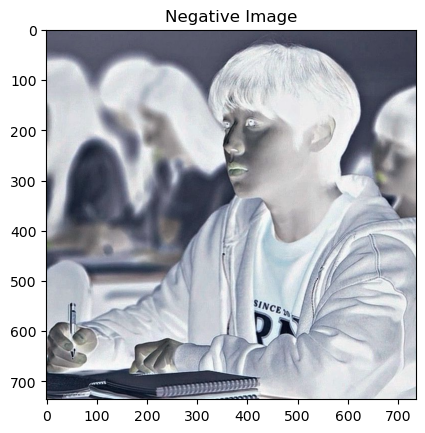

In [11]:
def negative_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    negative = 255 - image
    plt.imshow(negative, cmap='gray')
    plt.title('Negative Image')
    plt.show()

negative_image('image.jpg')


### Contrast Stretching vs Histogram Equalization

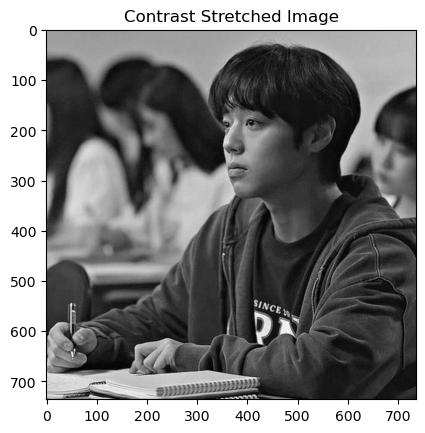

In [13]:
# Contrast stretching enhances contrast linearly,
# while histogram equalization redistributes pixel intensities based on their frequency.



def contrast_stretch(image_path):
    image = cv2.imread(image_path, 0)
    min_val = np.min(image)
    max_val = np.max(image)
    stretched = ((image - min_val) / (max_val - min_val)) * 255
    plt.imshow(stretched, cmap='gray')
    plt.title('Contrast Stretched Image')
    plt.show()

contrast_stretch('image.jpg')


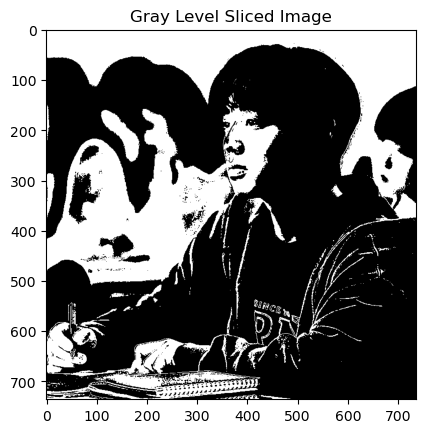

In [14]:
def gray_level_slicing(image_path, lower, upper):
    image = cv2.imread(image_path, 0)
    sliced = np.where((image >= lower) & (image <= upper), 255, 0)
    plt.imshow(sliced, cmap='gray')
    plt.title('Gray Level Sliced Image')
    plt.show()

gray_level_slicing('image.jpg', 100, 200)


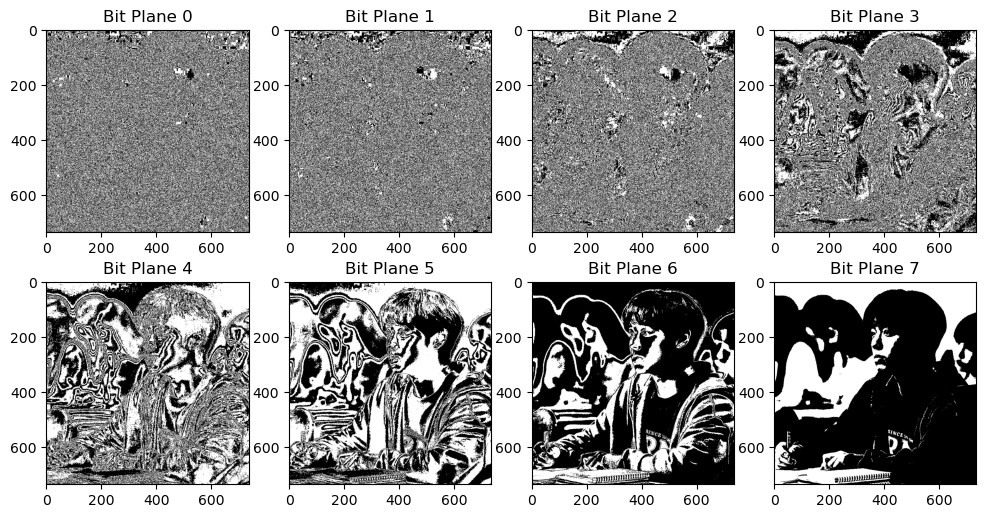

In [16]:
def bit_plane_slicing(image_path):
    image = cv2.imread(image_path, 0)
    plt.figure(figsize=(12, 6))
    for i in range(8):
        bit_plane = (image >> i) & 1
        plt.subplot(2, 4, i+1)
        plt.imshow(bit_plane*255, cmap='gray')
        plt.title(f'Bit Plane {i}')
    plt.show()

bit_plane_slicing('image.jpg')


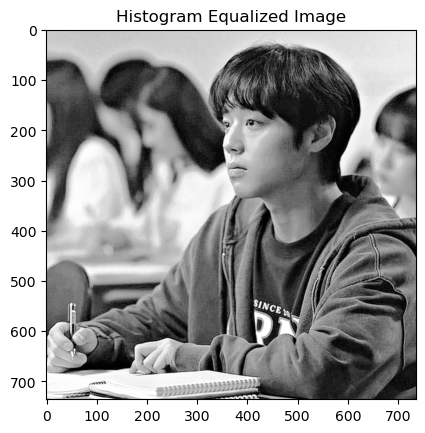

In [18]:
def hist_equalization(image_path):
    image = cv2.imread(image_path, 0)
    equalized = cv2.equalizeHist(image)
    plt.imshow(equalized, cmap='gray')
    plt.title('Histogram Equalized Image')
    plt.show()

hist_equalization('image.jpg')


In [ ]:
# explaination:

# Histogram Equalization enhances global contrast but may lose details in some areas.
# Adaptive Histogram Equalization (AHE) enhances local contrast by dividing the image into smaller tiles, 
# making it suitable for medical images like X-rays where local details are crucial.